In [44]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig, inv

f_no = np.loadtxt("potentialMap_nof.txt")
f_10 = np.loadtxt("potentialMap_10f.txt")
f_15 = np.loadtxt("potentialMap_15f.txt")
f_s3_15 = np.loadtxt("EllipticFit_AP/exp3/potentialMap.txt")
f_s5_10 = np.loadtxt("EllipticFit_AP/exp6/potentialMap.txt")
f_s5_15 = np.loadtxt("EllipticFit_AP/exp7/potentialMap.txt")

In [3]:
def fitEllipse(x,y):
    x = x[:,np.newaxis]
    y = y[:,np.newaxis]
    D =  np.hstack((x*x, x*y, y*y, x, y, np.ones_like(x)))
    S = np.dot(D.T,D)
    C = np.zeros([6,6])
    C[0,2] = C[2,0] = 2; C[1,1] = -1
    E, V =  eig(np.dot(inv(S), C))
    n = np.argmax(np.abs(E))
    a = V[:,n]
    return a


In [33]:
def findBoundForward(p_map):
    bound = [[], []]
    n = p_map.shape[0]
    for i in range(0, n):
        j = 0
        while (j < n and p_map[i][j] < -30):
            j += 1
        if j < n and p_map[i][j] >= -30:
            bound[0].append(j)
            bound[1].append(i)
    return bound
            
def findBoundBackward(p_map):
    bound = [[], []]
    n = p_map.shape[0]
    for i in range(0, n):
        j = n-1
        while (j > -1 and p_map[i][j] < -30):
            j -= 1
        if j > -1 and p_map[i][j] >= -30:
            bound[0].append(j)
            bound[1].append(i)
    return bound
        
        

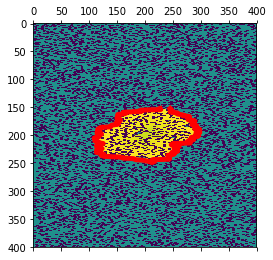

In [45]:
bdf = findBoundForward(f_s5_10)
bdb = findBoundBackward(f_s5_10)

plt.matshow(f_s5_10)
plt.plot(bdf[0], bdf[1], "r", linewidth=5)
plt.plot(bdb[0], bdb[1], "r", linewidth=5)
plt.show()


In [50]:
def ellipse_center(a):
    b,c,d,f,g,a = a[1]/2, a[2], a[3]/2, a[4]/2, a[5], a[0]
    num = b*b-a*c
    x0=(c*d-b*f)/num
    y0=(a*f-b*d)/num
    return np.array([x0,y0])


def ellipse_angle_of_rotation( a ):
    b,c,d,f,g,a = a[1]/2, a[2], a[3]/2, a[4]/2, a[5], a[0]
    return 0.5*np.arctan(2*b/(a-c))


def ellipse_axis_length( a ):
    b,c,d,f,g,a = a[1]/2, a[2], a[3]/2, a[4]/2, a[5], a[0]
    up = 2*(a*f*f+c*d*d+g*b*b-2*b*d*f-a*c*g)
    down1=(b*b-a*c)*( (c-a)*np.sqrt(1+4*b*b/((a-c)*(a-c)))-(c+a))
    down2=(b*b-a*c)*( (a-c)*np.sqrt(1+4*b*b/((a-c)*(a-c)))-(c+a))
    res1=np.sqrt(up/down1)
    res2=np.sqrt(up/down2)
    return np.array([res1, res2])

In [85]:
a = fitEllipse(np.array(bdf[0] + bdb[0]), np.array(bdf[1] + bdb[1]))

center = ellipse_center(a)
phi = ellipse_angle_of_rotation(a)
axes = ellipse_axis_length(a)

x0 = y0 = 200
a, b = axes
print a, b
el = [[],[]]
err = 0.05
for i in range(400):
    for j in range(400):
        if (((i - x0)**2/(a**2)) + ((j - y0)**2/(b**2))) < 1:
            el[0].append(i)
            el[1].append(j)



89.7397912114 44.5727750772


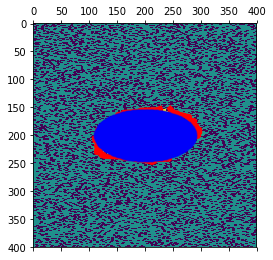

In [89]:
plt.matshow(f_s5_10)
plt.plot(bdf[0], bdf[1], "r", linewidth=5)
plt.plot(bdb[0], bdb[1], "r", linewidth=5)
plt.plot(el[0], el[1], "b.", alpha=0.2)
plt.show()
